# "A data-driven biology-based network model reproduces C. elegans premotor neural dynamics" figure bookmarks

## Load data from "compute_avg_weights" and make figures of synaptic weights

### [Results -> Model dynamics and parameters -> Figure 2](#Figure-2)



In [1]:
using Plots
using Statistics
using LaTeXStrings
using LinearAlgebra

In [2]:
curdir = pwd()
dir_one_up = abspath(joinpath(curdir, ".."))

"/Users/mmtre/Library/CloudStorage/OneDrive-IllinoisInstituteofTechnology/Github repos/Celegans_premotor/"

## Load processed White graph data

In [3]:
using DataFrames
using CSV

######################################################
###  load graph saved in White_graph_process  ########
######################################################
data_folder = "data/White_data_processed"
filename = "df5.csv"
filepath = joinpath(joinpath(dir_one_up, data_folder), filename);
df5 = DataFrame(CSV.File(filepath));

############################################
### take processed data from White #########
############################################

out_set = collect(Set(df5[!, :"Neuron2"]))
in_set = collect(Set(df5[!, :"Neuron1"]))
final_neurons = union(out_set, in_set)
N = size(final_neurons)[1]  ## number of neurons in my model
final_neuron_dict = Dict(zip(final_neurons, collect(1:N)))

#############################
### make EJ matrix ##########
#############################
df_EJ = filter(row -> row."Type" == "EJ",df5) # df_subset
EJ_mat = zeros(N,N)
for i in collect(1:size(df_EJ,1))
    w_tmp = df_EJ[i,:]["Nbr"]
    neuro1 = df_EJ[i,:]["Neuron1"]
    neuro2 = df_EJ[i,:]["Neuron2"]
    id1 = final_neuron_dict[neuro1]
    id2 = final_neuron_dict[neuro2]
    EJ_mat[id1, id2] = w_tmp
end

#############################
### make Syn matrix #########
#############################
df_S = filter(row -> row."Type" == "S",df5) # df_subset
S_mat = zeros(N,N)

for i in collect(1:size(df_S,1))
    w_tmp = df_S[i,:]["Nbr"]
    neuro1 = df_S[i,:]["Neuron1"]
    neuro2 = df_S[i,:]["Neuron2"]
    id1 = final_neuron_dict[neuro1]
    id2 = final_neuron_dict[neuro2]
    S_mat[id1, id2] = w_tmp
end

S_mat = S_mat'; # transpose for matrix multiplication
S_mat_bool = S_mat .!=0;

In [4]:
using JLD2

data_folder = "data/model_weights"
filename = "avg_model_weights.jld2"
filepath = joinpath(joinpath(dir_one_up, data_folder), filename);


#@save filepath A_10takes_avg d_10takes_avg
@load filepath A_10takes_avg d_10takes_avg

2-element Vector{Symbol}:
 :A_10takes_avg
 :d_10takes_avg

## SIGNS


Bookmark synaptic weights <a name='bookmark_syn_weights' />


In [5]:

## ADD in RID 
premotor_neurons_list = ["AVBL","AVBR","RIBL","RIBR","RID","AVDL","AVDR","AVAL","AVAR","RIML","RIMR","AVEL","AVER","AIBL","AIBR"]


pre_synaptic_neurons_list = ["URBL", "URBR", "AUAL", "AUAR", "URXL","URXR", "CEPDL","CEPDR","CEPVL","CEPVR", # forward promoting
    "AWBL","AWBR", "ADEL","ADER", "ASEL","ASER", "SMBDL", "SMBDR", # weak forward promoting
    "ADAL","ADAR", "RICL","RICR", "RIS", "FLPL","FLPR", "AQR", "BAGL", "BAGR", 
    "ADLL", "ADLR", "RMGL","RMGR", "AVJL","AVJR",# mixed signals
    "AIZL", "AIZR", "AWCL","AWCR", "OLLL", "OLLR", "SAADL", "SAADR", "SAAVL", "SAAVR", # weak reversal promoting
     "ASIL","ASIR", "ASGL", "ASGR","ASKL", "ASHL", "ASHR", "URYDL", "URYDR", "URYVL", "URYVR" # reversal promoting
]  

premotor_ids = []
for i in premotor_neurons_list
    append!(premotor_ids,final_neuron_dict[i])
end

pre_synaptic_ids = []
for i in pre_synaptic_neurons_list
    append!(pre_synaptic_ids,final_neuron_dict[i])
end

In [6]:

num_presyn = sum(sum(abs.(A_10takes_avg[premotor_ids,:]), dims = 1) .!=0)
println("number presynaptic to core = ", num_presyn)


num_preEJ = sum(sum(EJ_mat[premotor_ids,:], dims = 1) .!=0)
println("number of pre EJ to core = ", num_preEJ)

ids_presyn = vec(sum(abs.(A_10takes_avg[premotor_ids,:]), dims = 1) .!=0)
presyn_names = final_neurons[ids_presyn];


ids_preEJ = vec(sum(EJ_mat[premotor_ids,:], dims = 1) .!=0)
preEJ_names = final_neurons[ids_preEJ];

test = vcat(presyn_names, preEJ_names)

# Compute the set from the list
string_set = collect(Set(test))
 
println("number of whole-brain presyn = ", length(string_set)-length(premotor_ids))


number presynaptic to core = 87
number of pre EJ to core = 69
number of whole-brain presyn = 112


In [7]:
using Colors
using Plots

# Define the color array
#color_array = ["785964","856b72","917d80","9e8f8e","aaa19c","b7b2ab","c3c4b9","d0d6c7","dce8d5","e9fae3"]

color_array = ["160c28","2d2539","433f4b","5a585c","70716d","878b7f","9da490","b4bda1","cad7b3","e1f0c4"]

# Convert hexadecimal colors to RGB colors
rgb_colors = [parse(RGB, "#" * color) for color in color_array]


In [8]:
color_array = ["43c7c0","6ed0ca","99d8d4","c4e0de","efe8e7","f3b8b6","f68785","f95754","fc2622"]

#["6dd3ce","8ed8d5","aedddb","cfe2e1","efe7e7","e3afae","d77775","cb3f3c","bf0603"]
#["79a9d1","89b0c5","99b7b8","a9beac","b9c59f","c9cc93","d9d386","e9da79","f8e16c"]
#["381d2a","3a343d","3b4b4f","3c6262","3d7874","3e8f87","3fa699","40bdab","41d3bd"]

# Convert hexadecimal colors to RGB colors
rgb_colors = [parse(RGB, "#" * color) for color in color_array]

# Figure 2

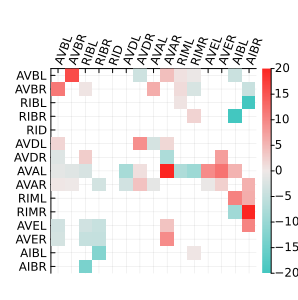

In [9]:
############################################################
##### Syn weights fig 1 - premotor to premotor #############
############################################################

A_premotor = A_10takes_avg[premotor_ids,premotor_ids]

A_premotor[A_premotor .==0] .= NaN


p1 = plot(heatmap(premotor_neurons_list,premotor_neurons_list,A_premotor,
 clim=(-20,20),  #(-10,10)
c =rgb_colors,  #rgb_colors
        aspect_ratio=:equal, 
        yflip = true,
        xmirror = true,
        xrotation = 70,
        #xlabel = "pre-synaptic",
        #ylabel = "post-synaptic",
        xticks=:all,
        yticks=:all),
size = (298,300))

#    clim=(-10,10)

display(p1)

#savefig(p1,"figures/synaptic_weights/syn_weights_premotor.png")
#savefig(p1,"figures/synaptic_weights/syn_weights_premotor.pdf")

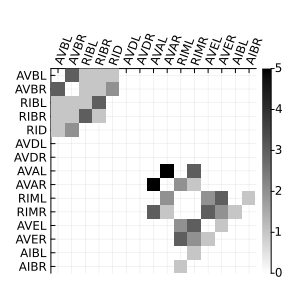

In [10]:
############################################################
##### Syn weights fig 1 - premotor to premotor #############
############################################################

clrsp = palette(:batlow10)
clrs = [clrsp[3], clrsp[3], clrsp[3], clrsp[3], clrsp[3], clrsp[5], clrsp[5],
    clrsp[8], clrsp[8], clrsp[8], clrsp[8], clrsp[8], clrsp[8], clrsp[8], clrsp[8]]


# Generate a list of colors for each xtick label
clrs = [:blue, :red, :green, :purple, :orange, :cyan, :magenta, :yellow, :black, :brown, :brown, :brown, :brown, :brown, :brown]


EJ_premotor = EJ_mat[premotor_ids,premotor_ids]

EJ_premotor[EJ_premotor .== 0] .=NaN

p1 = plot(heatmap(premotor_neurons_list,premotor_neurons_list,EJ_premotor,
        aspect_ratio=:equal, 
    c =reverse(cgrad(:greys)),
        yflip = true,
        xmirror = true,
        xrotation = 70,
        #xlabel = "neuron 1",
        #ylabel = "neuron 2",
        xticks=:all,
        yticks=:all,
        clim=(0,5)), size = (298,300))   #size = (298,300)


display(p1)


#savefig(p1,"figures/synaptic_weights/EJ_weights_premotor.pdf")

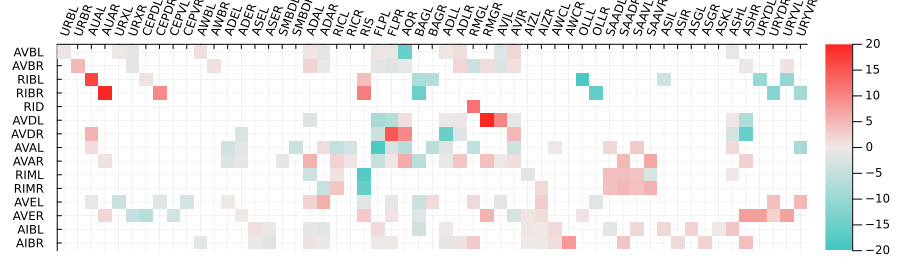

In [11]:
############################################################
##### Syn weights fig 2 - sensory to premotor  #############
############################################################

#pre_synaptic_neurons_list
#collect(1:33)

A_sensory_premotor = A_10takes_avg[premotor_ids,pre_synaptic_ids]

A_sensory_premotor[A_sensory_premotor .==0] .= NaN

p1 = plot(heatmap(pre_synaptic_neurons_list,premotor_neurons_list,A_sensory_premotor,
c =rgb_colors,
        aspect_ratio=:equal, 
        yflip = true,
        xmirror = true,
        xrotation = 70,
        #xlabel = "pre-synaptic",
        #ylabel = "post-synaptic",
        xticks=:all,
        yticks=:all,
        clim=(-20,20), size = (910,275))) #

display(p1)

# savefig(p1,"figures/synaptic_weights/syn_weights_presyn.pdf")
# savefig(p1,"figures/synaptic_weights/syn_weights_presyn.png")

In [12]:
############################################################
##### EJ presyn weights - EJ to premotor  #############
############################################################
yes_no_EJ =vec(sum(EJ_mat[premotor_ids,:], dims = 1))  
preEJ_neurons_list = []
preEJ_ids = []

for i in 1:length(yes_no_EJ)
    #println(i)
    if yes_no_EJ[i] >0
        candidate_name = final_neurons[i]
        if candidate_name in premotor_neurons_list
            #println(candidate_name)
        else
            append!(preEJ_ids,final_neuron_dict[candidate_name])
            push!(preEJ_neurons_list,candidate_name)
        end
    end
end


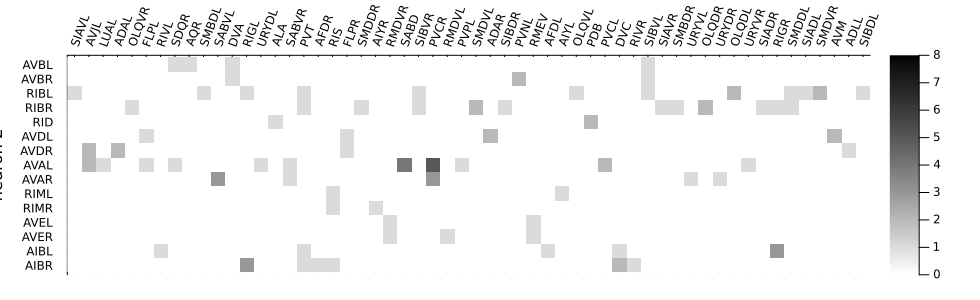

In [13]:

EJ_sensory_premotor = EJ_mat[premotor_ids,preEJ_ids]

p1 = plot(heatmap(preEJ_neurons_list,premotor_neurons_list,EJ_sensory_premotor,
c =reverse(cgrad(:greys)),
        aspect_ratio=:equal, 
        yflip = true,
        xmirror = true,
        xrotation = 70,
        xlabel = "neuron 1",
        ylabel = "neuron 2",
        xticks=:all,
        yticks=:all,
        clim=(0,8), size = (980,300))) #


display(p1)

#savefig(p1,"figures/synaptic_weights/EJ_weights_presyn.pdf")

In [14]:
maximum(filter(!isnan,EJ_sensory_premotor))

5.0

In [15]:
EJ_sensory_premotor = EJ_mat[premotor_ids,preEJ_ids]

15×56 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0  1.0  2.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0     1.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  …  0.0  0.0  0.0  0.0  2.0  0.0  0.0
 0.0  2.0  0.0  2.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  2.0  1.0  0.0  0.0  1.0  0.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  